In [63]:
import pandas as pd
import numpy as np

In [64]:
wdf=pd.read_csv('weather_actuals.csv')
pdf=pd.read_csv('power_actual.csv')

In [65]:
wdf.datetime_utc=pd.to_datetime(wdf.datetime_utc)
wdf.datetime_local=pd.to_datetime(wdf.datetime_local)
pdf.datetime=pd.to_datetime(pdf.datetime)

In [66]:
pdf=pdf[['datetime','power']]

In [67]:
pdf.set_index('datetime',inplace=True)
newpdf=pdf.resample('H').mean()

In [68]:
newpdf.reset_index(inplace=True)

In [69]:
newpdf.columns=['datetime_local','power']
df=wdf.merge(newpdf,on='datetime_local')

In [70]:
df.drop(columns=['Unnamed: 0', 'plant_id','datetime_utc'],inplace=True)
df[df==-9999]=np.nan

In [71]:
df.drop(columns=['wind_chill', 'heat_index','qpf','snow','pop','fctcode','precip_accumulation'],inplace=True)

In [72]:
df.cloud_cover=df.cloud_cover.interpolate()
df.wind_bearing=df.wind_bearing.interpolate()
df.wind_speed=df.wind_speed.interpolate()
df.wind_gust=df.wind_gust.interpolate()
df.pressure=df.pressure.interpolate()
df.uv_index=df.uv_index.interpolate()
df.ozone=df.ozone.interpolate()
df.precip_intensity=df.precip_intensity.interpolate()
df.precip_probability=df.precip_probability.interpolate()
df.precip_type=df.precip_type.interpolate()
df.visibility=df.visibility.interpolate()

In [73]:
print(df.precip_type.value_counts())
df.drop(columns=['precip_type'],inplace=True)

rain     6147
-9999     343
Name: precip_type, dtype: int64


In [74]:
df.drop(columns=['datetime_local','sunrise','sunset','updated_at'],inplace=True)

In [76]:
df=df.fillna(df.mean())
df.isnull().sum()

cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
icon                    0
summary                 0
power                   0
dtype: int64

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [78]:
df.shape

(13619, 17)

In [79]:
df=df[df.power<30]

In [80]:
df.shape

(13549, 17)

In [81]:
df.drop(columns=['icon'],inplace=True)

In [82]:
newg=df.groupby('summary').agg('mean')
newg=newg.reset_index()

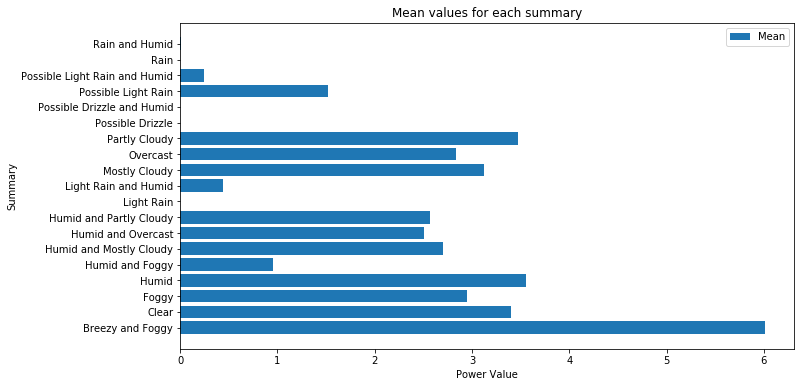

In [83]:
#newg=newg.reset_index()
plt.figure(figsize=(11,6))
plt.barh(newg.summary,newg.power, label='Mean')
plt.legend()
plt.xlabel('Power Value')
plt.ylabel('Summary')
#plt.xticks(range(newg.power.astype(int).min(),newg.power.astype(int).max()))
plt.title('Mean values for each summary')
plt.show()

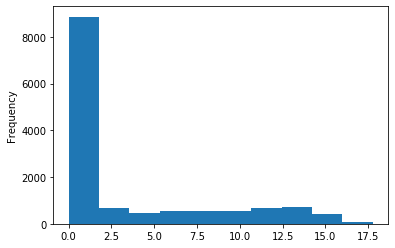

In [84]:
df.power.plot(kind='hist')

In [85]:
one_hot = pd.get_dummies(df['summary'])
df = df.drop('summary',axis = 1)
df = df.join(one_hot)

In [86]:
df

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,Light Rain and Humid,Mostly Cloudy,Overcast,Partly Cloudy,Possible Drizzle,Possible Drizzle and Humid,Possible Light Rain,Possible Light Rain and Humid,Rain,Rain and Humid
0,0.00,26.52,26,1,19.46,308.000000,0.830000,4.245261,1007.900000,1.87127,...,0,0,0,0,0,0,0,0,0,0
1,0.00,28.78,27,1,20.06,295.333333,0.703333,4.245261,1007.973333,1.87127,...,0,0,0,0,0,0,0,0,0,0
2,0.00,26.58,26,1,19.97,282.666667,0.576667,4.245261,1008.046667,1.87127,...,0,0,0,0,0,0,0,0,0,0
3,0.00,23.84,23,1,18.66,270.000000,0.450000,4.245261,1008.120000,1.87127,...,0,0,0,0,0,0,0,0,0,0
4,0.00,24.13,24,1,17.84,264.500000,0.475000,4.245261,1008.296667,1.87127,...,0,0,0,0,0,0,0,0,0,0
5,0.00,24.13,24,1,17.84,259.000000,0.500000,4.245261,1008.473333,1.87127,...,0,0,0,0,0,0,0,0,0,0
6,0.00,21.87,22,1,17.45,253.500000,0.525000,4.245261,1008.650000,1.87127,...,0,0,0,0,0,0,0,0,0,0
7,0.00,25.23,25,1,17.71,248.000000,0.550000,4.245261,1009.083333,1.87127,...,0,0,0,0,0,0,0,0,0,0
8,0.00,24.29,24,1,18.94,242.500000,0.575000,4.245261,1009.516667,1.87127,...,0,0,0,0,0,0,0,0,0,0
9,0.00,26.56,26,1,17.33,237.000000,0.600000,4.245261,1009.950000,1.87127,...,0,0,0,0,0,0,0,0,0,0


In [87]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [88]:
from sklearn.model_selection import train_test_split

In [94]:
arr=['cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'Breezy and Foggy', 'Clear', 'Foggy', 'Humid',
       'Humid and Foggy', 'Humid and Mostly Cloudy', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Light Rain', 'Light Rain and Humid',
       'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Possible Drizzle',
       'Possible Drizzle and Humid', 'Possible Light Rain',
       'Possible Light Rain and Humid', 'Rain', 'Rain and Humid']

In [96]:
x=df[arr]

In [97]:
y=df['power']

In [99]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()

In [104]:
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
predicted=reg.predict(xtest)

In [107]:
predicted

array([ 1.44296229,  2.13447593,  1.12729207, ...,  0.25869908,
        0.05399635, -0.29933837])

In [109]:
result=pd.DataFrame()

In [110]:
result['actual']=ytest
result['predicted']=predicted

In [118]:
result.sort_values(by='actual',inplace=True)

In [119]:
reg.score(xtest,ytest)

0.549587630221154

In [122]:
df.to_csv('data.csv')

In [123]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [124]:
RFpredicted=regressor.predict(xtest)

In [125]:
regressor.score(xtest,ytest)

0.7675576208624668

In [126]:
result['RFpredicted']=RFpredicted

In [127]:
result

,actual,predicted,RFpredicted
7646,0.0000,0.518092,0.564650
5123,0.0000,1.072792,0.202850
13159,0.0000,0.582716,0.027376
9736,0.0000,-1.321682,7.297325
11391,0.0000,-1.771236,6.370400
10525,0.0000,-0.308481,0.513025
3357,0.0000,0.388944,0.475050
7952,0.0000,-0.572843,0.120550
1590,0.0000,1.547227,0.316250
3454,0.0000,-0.287072,0.086575


In [135]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()

In [136]:
knnmodel.fit(xtrain.astype(int),ytrain.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [137]:
knnmodel.score(xtest.astype(int),ytest.astype(int))

0.6290282902829029

In [140]:
import pickle
filename = 'RFmodel.sav'
pickle.dump(regressor, open(filename, 'wb')) #save random forest model

In [143]:
df.columns

Index(['cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'power', 'Breezy and Foggy', 'Clear', 'Foggy', 'Humid',
       'Humid and Foggy', 'Humid and Mostly Cloudy', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Light Rain', 'Light Rain and Humid',
       'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Possible Drizzle',
       'Possible Drizzle and Humid', 'Possible Light Rain',
       'Possible Light Rain and Humid', 'Rain', 'Rain and Humid'],
      dtype='object')

In [148]:
result['KNNPredictions']=knnmodel.predict(xtest)

In [150]:
result.columns=['Actual','LinearRegressionPrediction','RandomForestPrediction','KNNPrediction']

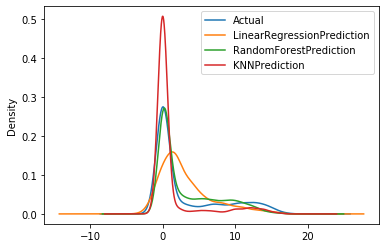

In [161]:
result.plot.kde()